# Dimensionality Reduction Analysis (DRA) Dataset D

In [1]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from tqdm import tqdm
print('Libraries imported!!')

Libraries imported!!


In [2]:
#define directory of functions and actual directory
HOME_PATH = '' #home path of the project
FUNCTIONS_DIR = 'EVALUATION FUNCTIONS/RESEMBLANCE'
ACTUAL_DIR = os.getcwd()

#change directory to functions directory
os.chdir(HOME_PATH + FUNCTIONS_DIR)

#import functions for univariate resemblance analisys
from dimensional_resemblance import preprocess_data
from dimensional_resemblance import pca_transform
from dimensional_resemblance import isomap_transform
from dimensional_resemblance import umap_transform
from dimensional_resemblance import dra_distance

#change directory to actual directory
os.chdir(ACTUAL_DIR)
print('Functions imported!!')

Functions imported!!


## 1. Read real and synthetic datasets
In this part real and synthetic datasets are read.

In [3]:
#Define global variables
DATA_TYPES = ['Real','GM','SDV','CTGAN','WGANGP']
SYNTHESIZERS = ['GM','SDV','CTGAN','WGANGP']
FILEPATHS = {'Real' : HOME_PATH + 'REAL DATASETS/TRAIN DATASETS/D_ContraceptiveMethod_Real_Train.csv',
            'GM' : HOME_PATH + 'SYNTHETIC DATASETS/GM/D_ContraceptiveMethod_Synthetic_GM.csv',
            'SDV' : HOME_PATH + 'SYNTHETIC DATASETS/SDV/D_ContraceptiveMethod_Synthetic_SDV.csv',
            'CTGAN' : HOME_PATH + 'SYNTHETIC DATASETS/CTGAN/D_ContraceptiveMethod_Synthetic_CTGAN.csv',
            'WGANGP' : HOME_PATH + 'SYNTHETIC DATASETS/WGANGP/D_ContraceptiveMethod_Synthetic_WGANGP.csv'}
categorical_columns = ['wife_education','husband_education','wife_religion','wife_working','husband_occupation',
                        'standard_of_living_index','media_exposure','contraceptive_method_used']
data = dict()

In [4]:
#iterate over all datasets filepaths and read each dataset
for name, path in FILEPATHS.items() :
    data[name] = pd.read_csv(path)
    for col in categorical_columns :
        data[name][col] = data[name][col].astype('category')
data

{'Real':       wife_age wife_education husband_education  children wife_religion  \
 0           36              2                 4        11             1   
 1           48              1                 3         4             1   
 2           38              1                 2         8             1   
 3           27              2                 2         5             1   
 4           26              3                 2         4             1   
 ...        ...            ...               ...       ...           ...   
 1173        34              2                 4         6             1   
 1174        23              4                 4         1             1   
 1175        29              3                 4         3             1   
 1176        37              4                 4         5             0   
 1177        31              4                 4         2             1   
 
      wife_working husband_occupation standard_of_living_index media_exposure 

## 2. Preprocess variables for data reduction

In [5]:
data_scaled = dict()
for name in tqdm(DATA_TYPES) :
    data_scaled[name] = preprocess_data(data[name])
    print(name, ':', data_scaled[name].shape)
data_scaled

  0%|          | 0/5 [00:00<?, ?it/s]

Real : (1178, 27)
GM : (1178, 27)
SDV : (1178, 27)


100%|██████████| 5/5 [00:00<00:00, 64.55it/s]

CTGAN : (1178, 27)
WGANGP : (1178, 23)


{'Real': array([[ 0.38065423,  3.15717708,  0.        , ...,  0.        ,
          0.        ,  1.        ],
        [ 1.8213311 ,  0.26995492,  1.        , ...,  1.        ,
          0.        ,  0.        ],
        [ 0.62076704,  1.91979616,  1.        , ...,  1.        ,
          0.        ,  0.        ],
        ...,
        [-0.45974062, -0.14250539,  0.        , ...,  0.        ,
          0.        ,  1.        ],
        [ 0.50071063,  0.68241523,  0.        , ...,  0.        ,
          0.        ,  1.        ],
        [-0.21962781, -0.5549657 ,  0.        , ...,  1.        ,
          0.        ,  0.        ]]),
 'GM': array([[ 1.53302934, -0.74146132,  0.        , ...,  1.        ,
          0.        ,  0.        ],
        [-2.21585642, -1.14322831,  0.        , ...,  0.        ,
          0.        ,  1.        ],
        [-1.1614823 , -0.74146132,  0.        , ...,  0.        ,
          0.        ,  1.        ],
        ...,
        [ 0.47865522,  1.66914062,  0.  

## 3. Principal Component Analysis (PCA)

In [6]:
pca = dict()
pca['Real'] = pca_transform(data_scaled['Real'], np.zeros((len(data_scaled['Real']), 1)))
for name in SYNTHESIZERS :
    pca[name] = pca_transform(data_scaled[name], np.ones((len(data_scaled[name]), 1)))
pca

{'Real':            PC1       PC2  Label
 0     2.549848 -0.580300    0.0
 1     1.563014 -0.835326    0.0
 2     1.883892 -1.548393    0.0
 3    -0.071545 -1.465173    0.0
 4    -0.416027 -0.937382    0.0
 ...        ...       ...    ...
 1173  0.812828 -0.281382    0.0
 1174 -1.519177  0.777645    0.0
 1175 -0.595645 -0.665249    0.0
 1176  0.775804  1.023182    0.0
 1177 -0.550134  0.660737    0.0
 
 [1178 rows x 3 columns],
 'GM':            PC1       PC2  Label
 0     0.624165 -1.803536    1.0
 1    -2.480366  0.516094    1.0
 2    -1.395908  1.318373    1.0
 3    -0.075874 -1.073158    1.0
 4    -0.791938  0.326792    1.0
 ...        ...       ...    ...
 1173  0.776308 -0.842350    1.0
 1174 -1.731291  1.298798    1.0
 1175  1.494587 -0.249066    1.0
 1176 -0.746543 -0.023678    1.0
 1177 -1.005583 -0.147075    1.0
 
 [1178 rows x 3 columns],
 'SDV':            PC1       PC2  Label
 0    -0.246094 -0.152000    1.0
 1     1.963307 -0.768420    1.0
 2    -1.184298  0.682189    1.0

GM
- Joint distance:  0.0514
#############################################
SDV
- Joint distance:  0.081
#############################################
CTGAN
- Joint distance:  0.0926
#############################################
WGANGP
- Joint distance:  0.1318
#############################################


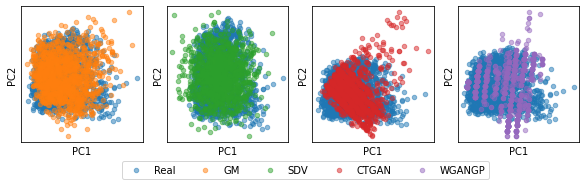

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10,2.5))
axs_idxs = range(4)
idx = dict(zip(SYNTHESIZERS,axs_idxs))
targets = [0,1]
COLORS = [['tab:blue','tab:orange'], ['tab:blue','tab:green'], ['tab:blue','tab:red'], ['tab:blue','tab:purple']]
cont = 0
first = True 
legend_data = list()
pca_real = pca['Real'][['PC1','PC2']]
for name in SYNTHESIZERS :
    
    pca_data = pd.DataFrame(data=pca['Real'], columns=['PC1','PC2','Label']).append(pca[name]).sample(frac=1)
    ax = axs[idx[name]]
    colors = COLORS[cont]
    
    for target, color in zip(targets,colors):
        indicesToKeep = pca_data['Label'] == target
        handles = ax.scatter(pca_data.loc[indicesToKeep, 'PC1'], pca_data.loc[indicesToKeep, 'PC2'], c = color, s = 20, alpha = 0.5)
        
        if target == 1 or first == True :
            legend_data.append(handles)
            first = False
            
        pca_synthetic = pca[name][['PC1','PC2']]
    
    print(name)
    joint_dist = dra_distance(pca_real, pca_synthetic)
    print('- Joint distance: ', joint_dist)
    print('#############################################')
             
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_xticks([])
    ax.set_yticks([])
    cont=cont+1

ax.legend(handles=legend_data, ncol=5, labels=DATA_TYPES, bbox_to_anchor=(0.3,-0.1))
fig.savefig('DATA REDUCTION RESULTS/PCA_PLOTS.png', bbox_inches='tight')

## 4. ISOMAP

In [8]:
isomap = dict()
isomap['Real'] = isomap_transform(data_scaled['Real'], np.zeros((len(data_scaled['Real']), 1)))
for name in SYNTHESIZERS :
    isomap[name] = isomap_transform(data_scaled[name], np.ones((len(data_scaled[name]), 1)))
isomap

{'Real':            PC1       PC2  Label
 0    -1.372420  2.770542    0.0
 1     4.565665  3.877491    0.0
 2     4.244626  6.180962    0.0
 3     4.150308  0.253362    0.0
 4     1.226861 -1.283487    0.0
 ...        ...       ...    ...
 1173 -0.536602  0.485323    0.0
 1174 -2.838306 -2.523901    0.0
 1175  1.318988 -1.564814    0.0
 1176 -3.774998 -1.663406    0.0
 1177 -1.213644 -0.851443    0.0
 
 [1178 rows x 3 columns],
 'GM':            PC1       PC2  Label
 0     3.554265 -0.629403    1.0
 1    -3.260909 -2.498989    1.0
 2    -4.378205  1.895613    1.0
 3     2.198124 -1.022701    1.0
 4    -2.193703 -0.673625    1.0
 ...        ...       ...    ...
 1173  1.740832  1.257529    1.0
 1174 -4.376774  0.339925    1.0
 1175  4.589285 -1.210701    1.0
 1176 -1.729866 -2.423614    1.0
 1177 -1.454560 -1.568936    1.0
 
 [1178 rows x 3 columns],
 'SDV':            PC1       PC2  Label
 0    -0.735310 -0.388795    1.0
 1     3.352860 -1.458006    1.0
 2     0.383819  3.201355    1.0

GM
- Joint distance:  0.3474
#############################################
SDV
- Joint distance:  0.5151
#############################################
CTGAN
- Joint distance:  0.5381
#############################################
WGANGP
- Joint distance:  0.5561
#############################################


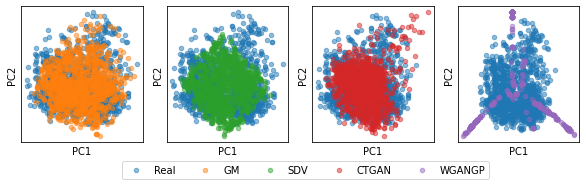

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10, 2.5))
axs_idxs = range(4)
idx = dict(zip(SYNTHESIZERS,axs_idxs))
targets = [0,1]
COLORS = [['tab:blue','tab:orange'], ['tab:blue','tab:green'], ['tab:blue','tab:red'], ['tab:blue','tab:purple']]
cont = 0
first = True 
legend_data = list()
isomap_real = isomap['Real'][['PC1','PC2']]
for name in SYNTHESIZERS :
    
    isomap_data = pd.DataFrame(data=isomap['Real'], columns=['PC1','PC2','Label']).append(isomap[name]).sample(frac=1)
    ax = axs[idx[name]]
    colors = COLORS[cont]
    
    for target, color in zip(targets,colors):
        indicesToKeep = isomap_data['Label'] == target
        handles = ax.scatter(isomap_data.loc[indicesToKeep, 'PC1'], isomap_data.loc[indicesToKeep, 'PC2'], c = color, s = 20, alpha = 0.5)
        
        if target == 1 or first == True :
            legend_data.append(handles)
            first = False
            
        isomap_synthetic = isomap[name][['PC1','PC2']]
        
    print(name)
    joint_dist = dra_distance(isomap_real, isomap_synthetic)
    print('- Joint distance: ', joint_dist)
    print('#############################################')
             
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_xticks([])
    ax.set_yticks([])
    cont=cont+1

ax.legend(handles=legend_data, ncol=5, labels=DATA_TYPES, bbox_to_anchor=(0.3,-0.1))
fig.savefig('DATA REDUCTION RESULTS/ISOMAP_PLOTS.png', bbox_inches='tight')